# <div style=" text-align: center; font-weight: bold">Phase 04: Modelling</div>



The problem 01: In the `Price` column of the dataframe, we can see that there is many value is `Thỏa thuận`, so the purpose of us is predict the price the house base on its attributes.

## **Import necessary Python modules**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### **Read the data from file**
First, read the clean data that we cleaned before to a dataframe.

In [30]:
real_estate_for_sale_df = pd.read_csv('../Data/cleaned_real_estate_for_sale.csv', encoding='utf-8')

### **Preprocessing data**



#### Remove features that is not necessary for the model:
- We can see that, the column `Project` have many seperated values, also the `Posting date` column doesn't much meaning, so we will drop them.

In [31]:
real_estate_for_sale_df.drop(columns= ['Project', 'Posting date'], axis= 1, inplace= True)

Beside that, as we discuss before, for all the types of real estate, the column `District`, `Furniture` and `Legal` does not affect a lot to the price, so we also drop them

In [32]:
real_estate_for_sale_df.drop(columns= [ 'Furniture', 'Legal'], axis= 1, inplace= True)

### Convert all the non-numeric columns into numeric columns:
Now, we will convert all the columns in dataframe in to numerical data types


#### Normalize the value 
For this normalize, we use `One hot encoding`

In [33]:
real_estate_for_sale_df = pd.get_dummies(real_estate_for_sale_df, columns=['Type', 'District'])

real_estate_for_sale_df

,Area(m2),Price(VNĐ),Bedroom(Phòng),Toilet(Phòng),Floor(Tầng),Type_Căn hộ chung cư,"Type_Nhà biệt thự, liền kề",Type_Nhà mặt phố,Type_Nhà riêng,Type_Đất bán,...,District_Bình Tân,District_Cần Giờ,District_Củ Chi,District_Gò Vấp,District_Hóc Môn,District_Nhà Bè,District_Phú Nhuận,District_Thủ Đức,District_Tân Bình,District_Tân Phú
0,161.08,1.798000e+10,3.0,3.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,116.00,9.800000e+09,3.0,2.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,77.00,6.000000e+09,2.0,2.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,76.00,6.200000e+09,2.0,2.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,95.00,7.600000e+09,2.0,2.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43831,36.00,NaN,3.0,3.0,3.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
43832,140.00,3.400000e+10,5.0,6.0,6.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
43833,66.00,6.700000e+09,4.0,6.0,3.0,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
43834,63.00,5.700000e+09,1.0,1.0,1.0,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


Now, with the purpose of predict the price of real estate that have the price is `Thỏa thuận` (currently is `NaN`), we will seperate the dataframe into two part, one that price this  `Thỏa thuận` and all the others.

In [34]:
processed_real_estate_df = real_estate_for_sale_df[real_estate_for_sale_df['Price(VNĐ)'].notna()]
data_to_predict_df = real_estate_for_sale_df[real_estate_for_sale_df['Price(VNĐ)'].isna()]

processed_real_estate_df

,Area(m2),Price(VNĐ),Bedroom(Phòng),Toilet(Phòng),Floor(Tầng),Type_Căn hộ chung cư,"Type_Nhà biệt thự, liền kề",Type_Nhà mặt phố,Type_Nhà riêng,Type_Đất bán,...,District_Bình Tân,District_Cần Giờ,District_Củ Chi,District_Gò Vấp,District_Hóc Môn,District_Nhà Bè,District_Phú Nhuận,District_Thủ Đức,District_Tân Bình,District_Tân Phú
0,161.08,1.798000e+10,3.0,3.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,116.00,9.800000e+09,3.0,2.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,77.00,6.000000e+09,2.0,2.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,76.00,6.200000e+09,2.0,2.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,95.00,7.600000e+09,2.0,2.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43829,78.20,4.000000e+09,-1.0,-1.0,-1.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
43830,140.00,1.150000e+10,4.0,4.0,3.0,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
43832,140.00,3.400000e+10,5.0,6.0,6.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
43833,66.00,6.700000e+09,4.0,6.0,3.0,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


#### Detect the outlier for each columns:

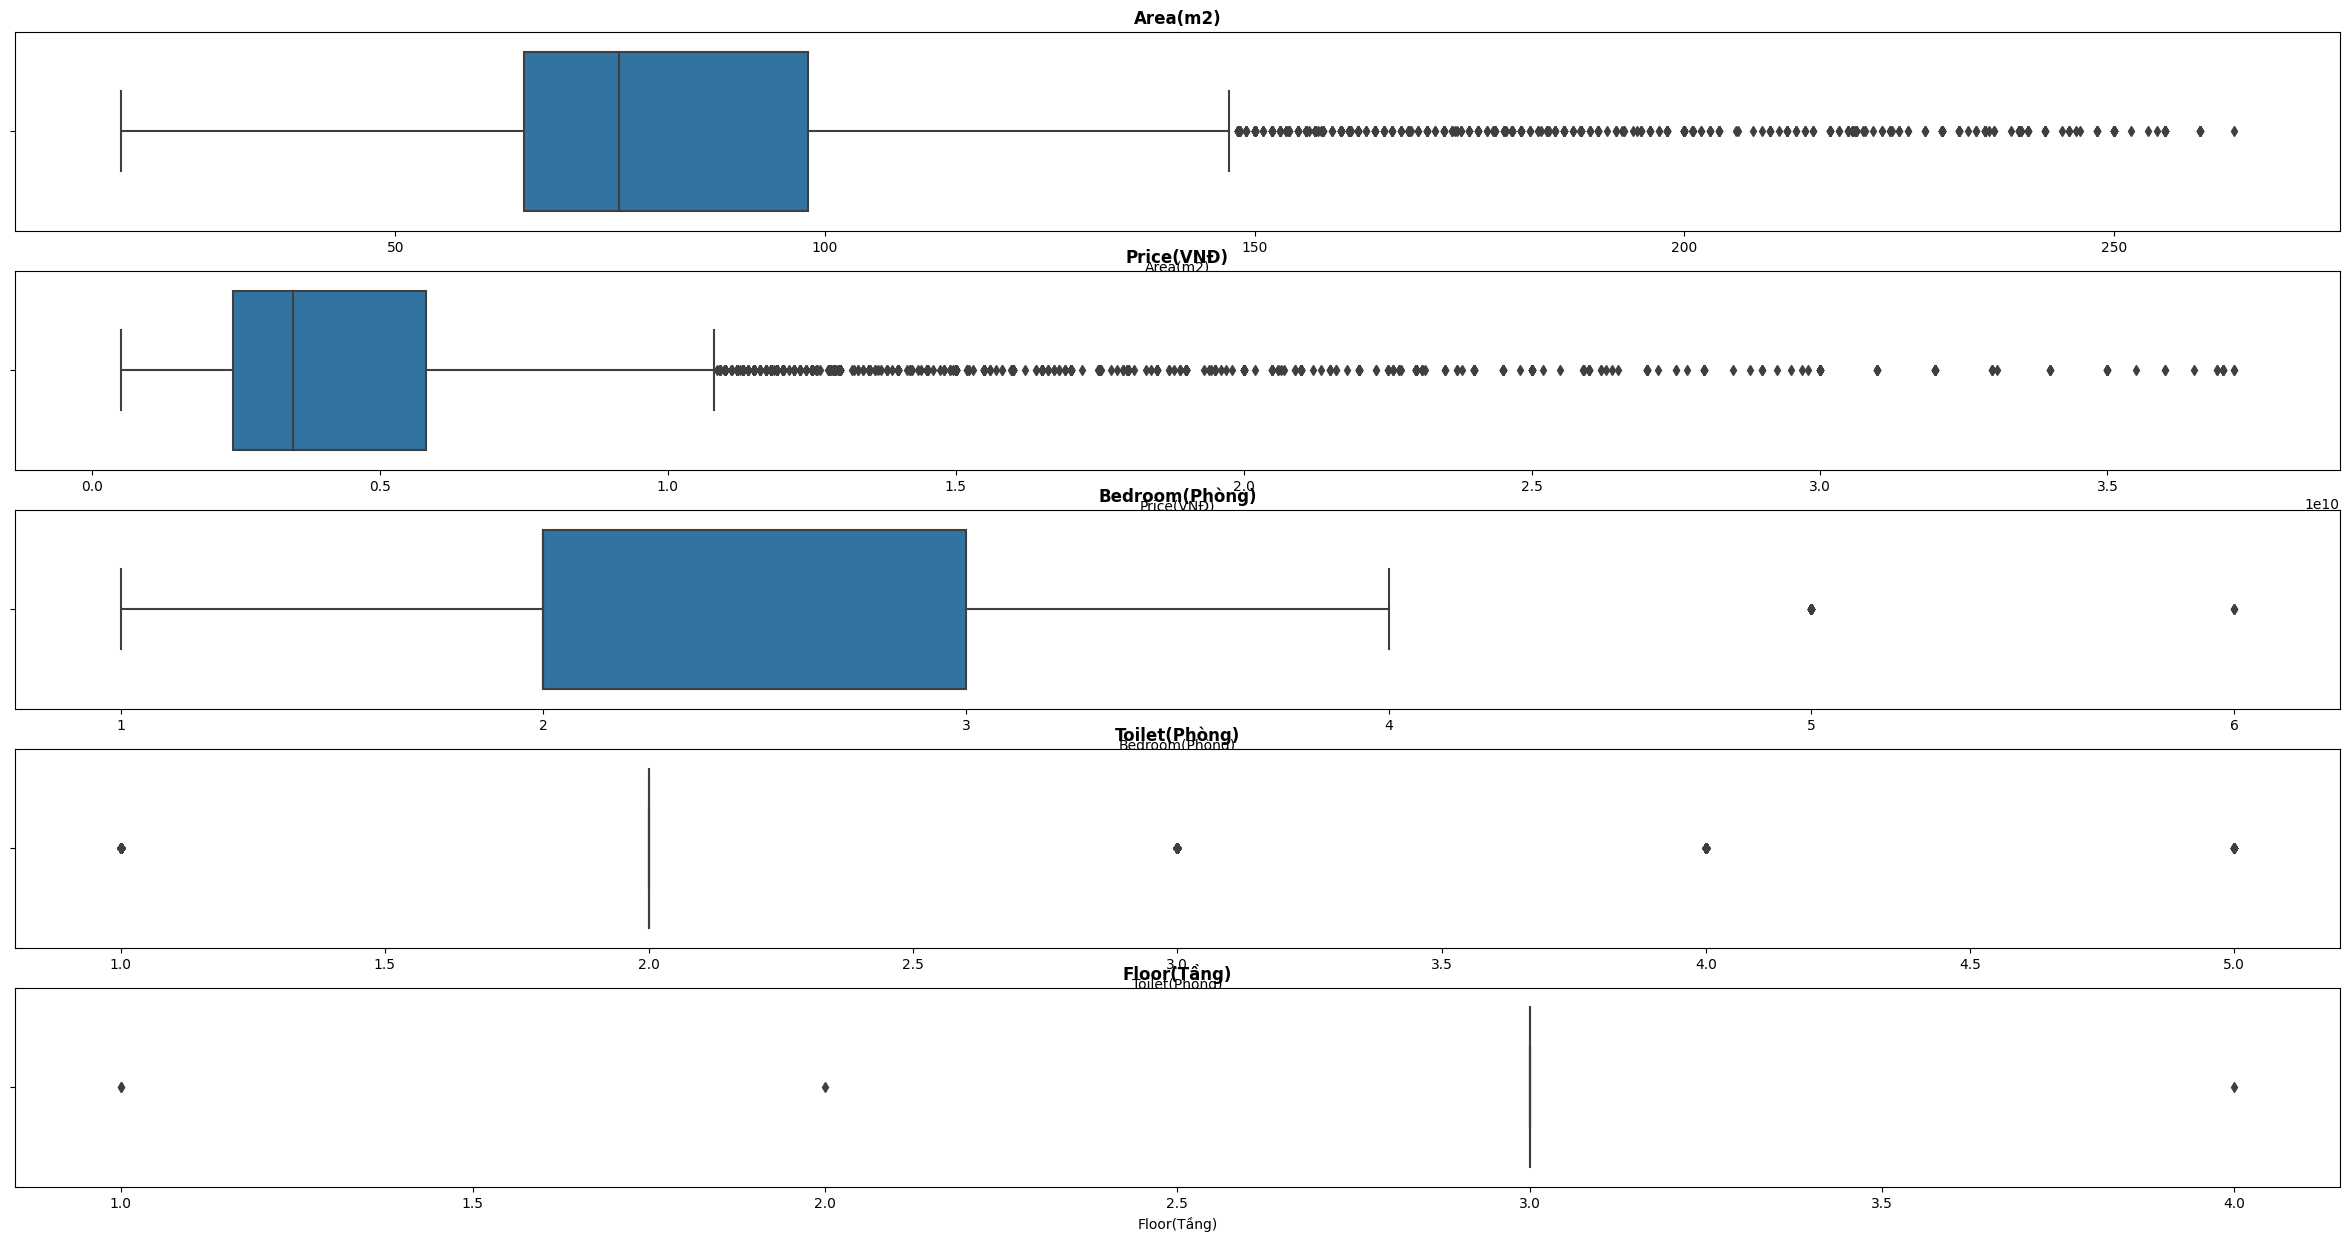

In [57]:

columns_to_plot = ['Area(m2)', 'Price(VNĐ)', 'Bedroom(Phòng)', 'Toilet(Phòng)', 'Floor(Tầng)']

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(30, 15))

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x = real_estate_for_sale_df[real_estate_for_sale_df['Type_Căn hộ chung cư'] == True][column], ax=axes[i])
    axes[i].set_title(column, fontweight = 'bold')

plt.show()

Now we have `processed_real_estate_df`, let's start to build a model

### **Build model**

Now, we will prepare the data for the linear regression model. First, we take the `Y` data frame is the `Price`, and `X` is all the attributes `Arre`, `Bedroom`, `Toilet`, `Floor` 
The purpose of linear regression is build a formula like

Câu chuyện, design cost funtion và minimize nó

In this section we will implement two type of linear regression:

- **Simple Linear Regression**:

    $$Y = \beta_0 + \beta_1 X $$

    Simple linear regression can be use to predict the price of type `Đất bán` and `Đất nền dự án` while the `Price` is just have much correlation with the `Area`

- **Multiple Linear Regression**

    $$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p $$

    For other types, we can use multiple  linear regression predict the price:
    
#### **Simple Linear Regression for landing sale:**
 - Lost function: 
    - Mean Square Error:
        **$$ \sum_{i=1}^{n}(y_i - \hat{y_i})^2$$**

    
- Cost function:
    
    **$$ J(\theta_{0}, \theta_{1}) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$**

In [36]:
land_for_sale = processed_real_estate_df.copy()[(processed_real_estate_df['Type_Căn hộ chung cư'] == True)]
land_for_sale

,Area(m2),Price(VNĐ),Bedroom(Phòng),Toilet(Phòng),Floor(Tầng),Type_Căn hộ chung cư,"Type_Nhà biệt thự, liền kề",Type_Nhà mặt phố,Type_Nhà riêng,Type_Đất bán,...,District_Bình Tân,District_Cần Giờ,District_Củ Chi,District_Gò Vấp,District_Hóc Môn,District_Nhà Bè,District_Phú Nhuận,District_Thủ Đức,District_Tân Bình,District_Tân Phú
0,161.08,1.798000e+10,3.0,3.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,116.00,9.800000e+09,3.0,2.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,77.00,6.000000e+09,2.0,2.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,76.00,6.200000e+09,2.0,2.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,95.00,7.600000e+09,2.0,2.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43818,85.00,3.300000e+09,3.0,2.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
43819,107.00,1.080000e+10,3.0,2.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
43820,85.00,2.690000e+09,3.0,2.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
43822,71.00,3.200000e+09,2.0,2.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [37]:
X_land = land_for_sale['Area(m2)']
y_land = land_for_sale['Price(VNĐ)']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_land, y_land, test_size=0.25, random_state=42)

<Axes: >

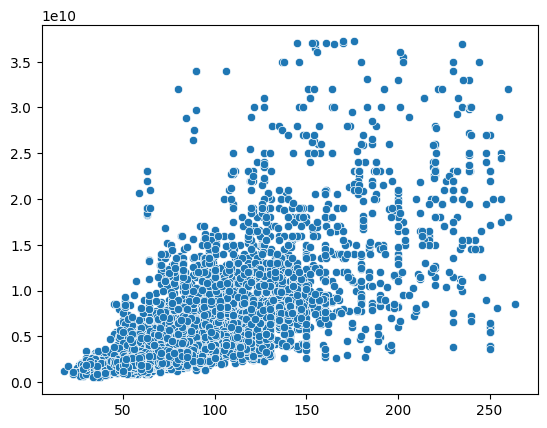

In [39]:
sns.scatterplot(x = X_land.values, y = y_land.values)


In [40]:
X = X_land.values.reshape(-1,1)
y = y_land.values.reshape(-1,1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(y)

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y_scaled,test_size=0.2)
print(X_train.shape)

(9820, 1)


In [42]:
lm = LinearRegression()

lm.fit(X_train,y_train)

y_pred=lm.predict(X_test)

scores = cross_val_score(lm, X_train, y_train, cv=7)
scores.mean().round(5)

0.52363

In [43]:

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.5065881681151279
Mean Absolute Error: 0.42467309086501775
R-squared: 0.5187598920895606


In [44]:
dic2={'Predictions by Sklearn':list(y_pred), 'Real values' : list(y_test)}
comparison_df=pd.DataFrame(dic2)

In [45]:
comparison_df

,Predictions by Sklearn,Real values
0,[1.1304116577795473],[-0.11188884028416496]
1,[-0.5313701433638878],[-0.4926816173822488]
2,[1.64330727541641],[0.6048975636651694]
3,[-1.146844884528123],[-0.7950758815483743]
4,[-0.7264756363129503],[-0.559880342752499]
...,...,...
2451,[0.7406109883755317],[0.4705001129246692]
2452,[0.3713261436769905],[0.7280952268439612]
2453,[-0.32621189630914277],[-0.5621203002648406]
2454,[0.7406109883755317],[0.4257009626778358]


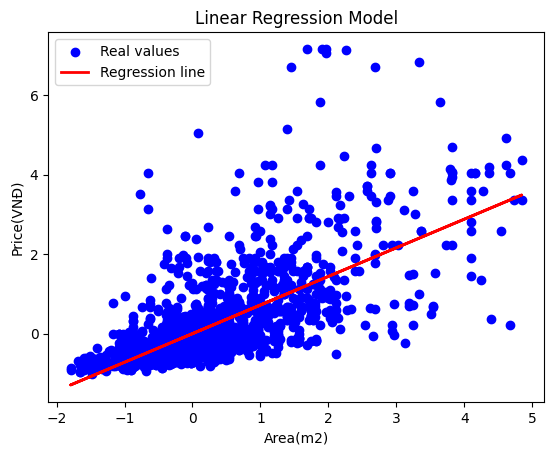

In [46]:
plt.scatter(X_test, y_test, color='blue', label='Real values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Area(m2)')
plt.ylabel('Price(VNĐ)')
plt.title('Linear Regression Model')
plt.legend()
plt.show()



### Multiple Linear Regression:

In [47]:
appartment_for_sale = processed_real_estate_df.copy()[(processed_real_estate_df['Type_Căn hộ chung cư'] == True)]
appartment_for_sale = appartment_for_sale.drop(columns= appartment_for_sale.columns[appartment_for_sale.columns.str.startswith('Type')])
appartment_for_sale.drop(columns=['Floor(Tầng)'], inplace= True)

In [48]:

X = appartment_for_sale.drop(columns=['Price(VNĐ)'])
y = appartment_for_sale['Price(VNĐ)']


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.model_selection import GridSearchCV

lm = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    # Add any other hyperparameters you want to tune
}

grid_search = GridSearchCV(lm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [51]:
print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(r2)

Best Hyperparameters: {'fit_intercept': False}
0.650397950033627


In [52]:

lm.fit(X_train,y_train)

y_pred=lm.predict(X_test)

scores = cross_val_score(lm, X_train, y_train, cv=7)
scores.mean().round(5)

0.66561

In [53]:
model = RandomForestRegressor()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

model.fit(X_train,y_train)

y_pred=lm.predict(X_test)

In [54]:
model = Ridge()
scores = cross_val_score(model, X_train, y_train, cv=7)
scores.mean().round(5)

0.66561

In [55]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 6.870383105172706e+18
Mean Absolute Error: 1584717257.8128622
R-squared: 0.650397950033627


In [56]:
dic2={'Predictions by Sklearn':list(y_pred), 'Real values' : list(y_test)}
comparison_df=pd.DataFrame(dic2)

comparison_df

,Predictions by Sklearn,Real values
0,2.378644e+09,1.750000e+09
1,1.518071e+09,1.800000e+09
2,6.941832e+09,3.500000e+09
3,2.577771e+09,2.000000e+09
4,2.694923e+09,2.500000e+09
...,...,...
2451,6.349984e+09,3.000000e+09
2452,2.506742e+09,2.600000e+09
2453,2.133490e+09,2.850000e+09
2454,1.240832e+09,2.300000e+09
